# Transfer Learning with VGG 19

## Import Libraries

In [1]:
# import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten

## Data Preprocessing

In [2]:
train_data_dir = 'Dataset/train'
validation_data_dir = 'Dataset/test'

### Preview Data

In [3]:
# print("Sample day image:")
# plt.imshow(load_img(f"{os.path.join(day_dir, os.listdir(day_dir)[0])}"))
# plt.show()

# print("\nSample night image:")
# plt.imshow(load_img(f"{os.path.join(night_dir, os.listdir(night_dir)[0])}"))
# plt.show()

### Image Augmentation

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Set up the data generator for training and validation
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                              target_size=(150, 150),
                                                              batch_size=32,
                                                              class_mode='categorical')

Found 1079 images belonging to 5 classes.
Found 216 images belonging to 5 classes.


## Modelling

### Pre-Trained Model Load

In [6]:
# Load the pre-trained VGG19 model
incv3 = tf.keras.applications.InceptionV3(weights='imagenet',
                                          include_top=False,
                                          input_shape=(150, 150, 3))

# Freeze the weights of the pre-trained layers
for layer in incv3.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 130s 1us/step


### Fine Tuning

In [7]:
# Add your custom layers on top of the pre-trained model
model = Sequential([
    incv3,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Look at model arshitecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 26,522,917
Trainable params: 4,720,133
Non-trainable params: 21,802,784
_________________________________________________________________


In [8]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
34/34 [==============================] - 18s 445ms/step - loss: 7.8166 - accuracy: 0.6135 - val_loss: 1.1506 - val_accuracy: 0.7870
Epoch 2/10
34/34 [==============================] - 14s 425ms/step - loss: 0.6406 - accuracy: 0.8304 - val_loss: 0.3186 - val_accuracy: 0.9120
Epoch 3/10
34/34 [==============================] - 15s 443ms/step - loss: 0.4731 - accuracy: 0.8554 - val_loss: 0.3021 - val_accuracy: 0.9120
Epoch 4/10
34/34 [==============================] - 15s 448ms/step - loss: 0.4438 - accuracy: 0.8545 - val_loss: 0.3324 - val_accuracy: 0.9074
Epoch 5/10
34/34 [==============================] - 15s 427ms/step - loss: 0.4122 - accuracy: 0.8721 - val_loss: 0.1733 - val_accuracy: 0.9398
Epoch 6/10
34/34 [==============================] - 15s 442ms/step - loss: 0.3352 - accuracy: 0.8953 - val_loss: 0.1821 - val_accuracy: 0.9306
Epoch 7/10
34/34 [==============================] - 14s 424ms/step - loss: 0.4159 - accuracy: 0.8675 - val_loss: 0.2160 - val_accuracy: 0.9444

## Model Evaluation

In [12]:
def plot_graghs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

### Accuracy

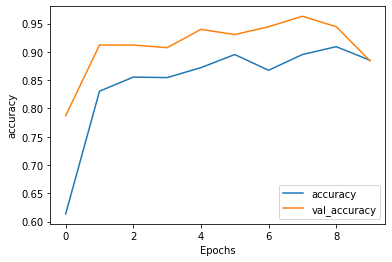

In [13]:
plot_graghs(history, 'accuracy')

### Loss

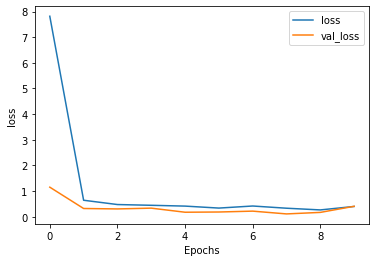

In [14]:
plot_graghs(history, 'loss')

## Save the Model

In [11]:
# Save the model
# model.save('e_waste_classifier.h5')